In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

### dataset collect
-images=[]
-labels=[]
-label_dic={}

In [74]:
def collect_data():
    images=[]
    labels=[]
    label_dic={}
    people=[person for person in os.listdir("user_data1")]
    for i,person in enumerate(people):
        label_dic[i]=person
        for img in os.listdir("user_data1/"+person):
            if img.endswith(".jpg") :
                imgs=cv2.imread("user_data1/"+person+"/"+img,0)
           ### img = cv2.resize(img, (64, 64))  ### used resize here for fast processing of image
                images.append(imgs)
                labels.append(i)
    return (images,labels,label_dic)    ###fix label target issue

In [75]:
    ### alternate: 
    ###c=[]
    ### for person in os.listdir(userdata1)
    ### c.append(person)

In [76]:
images,target, label_dic = collect_data()

In [77]:
print(len(images), len(target))

494 494


In [78]:
pd.Series(target).value_counts()

0    300
1    194
Name: count, dtype: int64

In [79]:
x=np.array(images)
y=np.array(target)

In [80]:
len(images)

494

In [81]:
pd.Series(target).value_counts()

0    300
1    194
Name: count, dtype: int64

In [82]:
x

array([[[144, 137, 139, ...,  16,  38,  43],
        [150, 139, 136, ...,  21,  50,  55],
        [149, 139, 136, ...,  28,  63,  68],
        ...,
        [ 65,  67,  75, ...,  89,  94,  90],
        [ 64,  70,  77, ...,  96,  99,  95],
        [ 66,  72,  78, ..., 103, 103,  98]],

       [[146, 144, 140, ...,  25,  42,  46],
        [152, 140, 141, ...,  21,  59,  55],
        [156, 143, 142, ...,  23,  67,  67],
        ...,
        [ 64,  66,  69, ...,  97,  95,  90],
        [ 67,  71,  74, ..., 104, 102,  97],
        [ 71,  77,  80, ..., 110, 107, 102]],

       [[195, 192, 188, ...,   0,   1,   0],
        [203, 195, 192, ...,   2,   0,   0],
        [206, 198, 196, ...,   3,   0,   3],
        ...,
        [ 41,  40,  43, ...,  59,  63,  62],
        [ 46,  42,  44, ...,  61,  66,  64],
        [ 50,  43,  44, ...,  62,  67,  68]],

       ...,

       [[250, 252, 254, ...,   1,   2,   2],
        [249, 251, 253, ...,   1,   1,   1],
        [250, 252, 253, ...,   1,   1,   0

In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [84]:
x_train = x.reshape(len(x), -1) ### check if its shape change or not

In [85]:
x_train.shape

(494, 8000)

Standardscale
pca
logistic svm decision tree knn

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaled_data=StandardScaler()
data=scaled_data.fit_transform(x_train)

In [88]:
from sklearn.decomposition import PCA
pca= PCA(0.98)
final_data= pca.fit_transform(data)

In [89]:
final_data.shape

(494, 167)

In [90]:
pca.n_components_

167

In [91]:
### SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV ,cross_val_score,KFold

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
scv=SVC(probability= True)

In [94]:
para={
    'C':[0.0001,0.001,0.01,0.1,1],
    'kernel':['rbf','linear']
}

In [95]:
kf=KFold(5,shuffle=True)

In [96]:
final_model=GridSearchCV(scv,param_grid=para,cv=kf,scoring="accuracy")

In [97]:
final_model.fit(final_data,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [98]:
final_model.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [99]:
final_model.best_score_

1.0

In [100]:
fsm=final_model.best_estimator_

In [101]:
fsm.fit(final_data,y)

SVC(C=0.1, probability=True)

In [102]:
fsm

SVC(C=0.1, probability=True)

In [103]:
import pickle

In [104]:
file1="face_recog_model.pkl"

In [105]:
f1=open(file1,"wb")

In [106]:
pickle.dump(fsm,f1)
f1.close()
print("Face_recog_model_saved!!!!")

Face_recog_model_saved!!!!


In [107]:
file2="Scaling_model.pkl"
f2=open(file2,"wb")
pickle.dump(scaled_data,f2)
f2.close()
print("Scaling model saved!!!!")

Scaling model saved!!!!


In [108]:
file3="pca_model.pkl"
f3=open(file3,"wb")
pickle.dump(pca,f3)
f3.close()
print("Pca model saved!!!!")

Pca model saved!!!!


### ignore anything that below this

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
### pca run without error
### model fit takes forever

In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)  

C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [54]:
y_pred=model.predict(x_test_pca)
x_pred=model.predict(x_train_pca)

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [56]:
print("Testing Accuracy:",accuracy_score(y_test,y_pred))
print("Training Accuracy:",accuracy_score(y_train,x_pred))

Testing Accuracy: 3.7037037037037037e-05
Training Accuracy: 0.004746031746031746


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.00      0.00      0.00       103
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00        79
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00       112
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        95
          13       0.00      0.00      0.00        82
          14       0.00      0.00      0.00        79
          15       0.00      0.00      0.00        83
          16       0.00      0.00      0.00        85
          17       0.00    

C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model=DecisionTreeClassifier(max_depth=3)

In [60]:
model.fit(x_train_pca,y_train)                  

DecisionTreeClassifier(max_depth=3)

In [61]:
from sklearn import tree

[Text(0.5, 0.875, 'x[57] <= -35.967\ngini = 0.997\nsamples = 63000\nvalue = [222, 197, 207, 200, 208, 221, 215, 196, 221, 207\n188, 222, 205, 218, 221, 217, 215, 210, 224, 207\n214, 197, 206, 215, 212, 219, 220, 207, 206, 198\n202, 224, 204, 208, 228, 200, 208, 224, 201, 206\n210, 202, 220, 220, 211, 214, 209, 214, 206, 213\n217, 219, 194, 211, 192, 215, 213, 217, 216, 211\n220, 210, 208, 210, 204, 227, 215, 202, 201, 218\n197, 210, 203, 214, 212, 213, 220, 201, 225, 213\n201, 198, 214, 212, 222, 206, 205, 210, 210, 217\n211, 215, 210, 211, 214, 209, 217, 204, 199, 210\n218, 217, 202, 217, 202, 210, 206, 197, 198, 210\n202, 203, 201, 195, 208, 213, 203, 222, 199, 215\n204, 212, 200, 203, 223, 205, 215, 208, 194, 196\n209, 233, 228, 197, 199, 222, 210, 206, 200, 220\n210, 222, 223, 219, 207, 201, 204, 215, 204, 199\n227, 191, 203, 228, 206, 201, 215, 214, 221, 212\n199, 206, 215, 208, 208, 219, 222, 228, 231, 206\n209, 214, 210, 211, 216, 218, 202, 198, 190, 187\n197, 201, 210, 201, 211

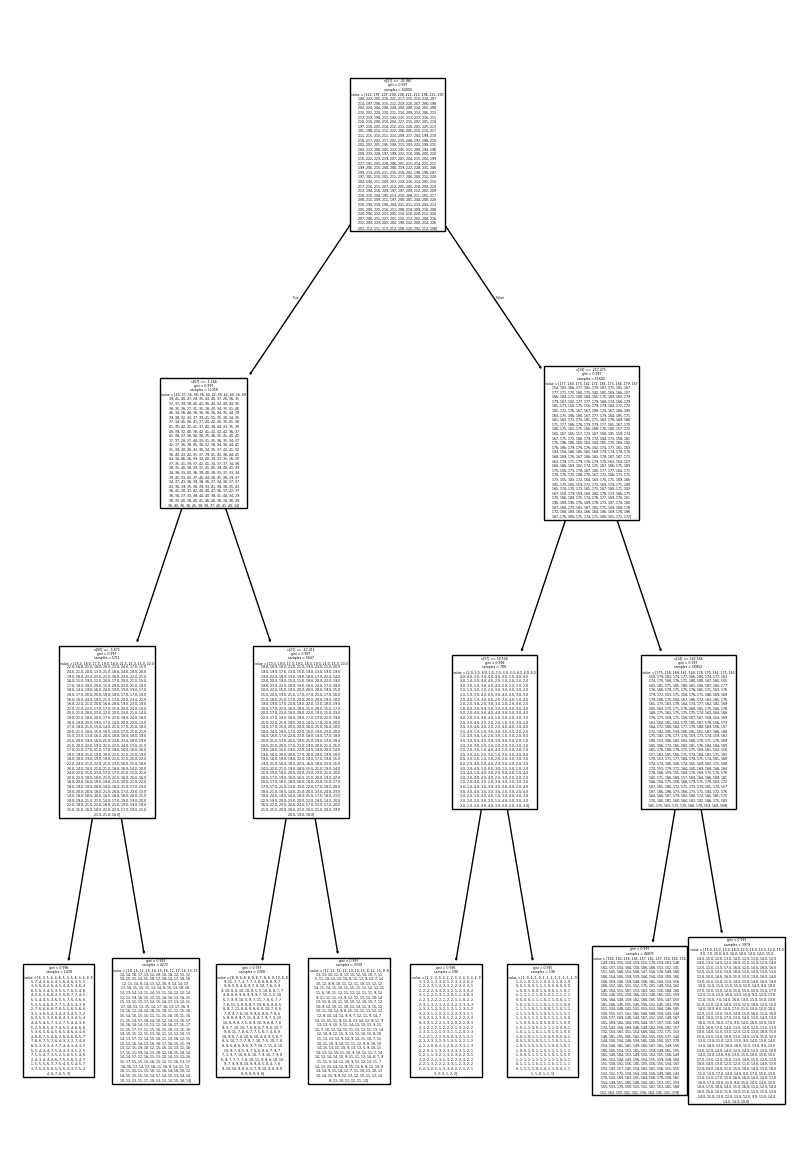

In [62]:
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)

In [63]:
y_pred=model.predict(x_test_pca)

In [64]:
x_pred=model.predict(x_train_pca)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.01      0.00        78
           1       0.00      0.00      0.00       103
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00        79
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00       112
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        95
          13       0.00      0.00      0.00        82
          14       0.00      0.00      0.00        79
          15       0.00      0.00      0.00        83
          16       0.00      0.00      0.00        85
          17       0.00    

C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anoop Arpan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
print(accuracy_score(y_test,y_pred))

0.0017407407407407408


In [67]:
from sklearn.cluster import KMeans

In [68]:
KMean=KMeans(n_clusters=3)

In [69]:
y_pred=KMean.fit(x_train_pca)

In [70]:
y_pred

KMeans(n_clusters=3)

In [71]:
x_pred=KMean.predict(x_test_pca)
x_pred

array([0, 1, 0, ..., 0, 0, 0])